In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
# from pandas.io.parsers import TextFileReader
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
ds = pd.read_csv('../train.csv', iterator=True, chunksize=500000)
# df = ds.get_chunk(1
# ds = pd.DataFrame()
# for chunk in pd.read_csv('../train.csv',chunksize=500000):
#     ds =pd.append(chunk)
# print(ds.read())

In [3]:
df= pd.DataFrame(ds.get_chunk(3500000))

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
print(df.shape)

(3500000, 10)


In [8]:
print (df)

                ID             datetime     siteid  offerid  category  \
0        IDsrk7SoW  2017-01-14 09:42:09  4709696.0   887235     17714   
1        IDmMSxHur  2017-01-18 17:50:53  5189467.0   178235     21407   
2        IDVLNN0Ut  2017-01-11 12:46:49    98480.0   518539     25085   
3        ID32T6wwQ  2017-01-17 10:18:43  8896401.0   390352     40339   
4        IDqUShzMg  2017-01-14 16:02:33  5635120.0   472937     12052   
5        IDjO9XQ1Z  2017-01-14 12:08:49  2729292.0   961176     33638   
6        IDUuVWVrO  2017-01-12 13:07:08  7007059.0   664666     68847   
7        IDFnmhUgG  2017-01-13 05:58:13  7295565.0   144797     33638   
8        IDeFBJfzG  2017-01-18 13:00:54  2116058.0   376073     15912   
9        IDmyijsRf  2017-01-14 12:38:58  5329483.0   952097     89680   
10       IDGQGYgdk  2017-01-14 11:06:26  6436389.0   949077     76239   
11       IDeS7iMpY  2017-01-12 03:36:53  6401189.0    68770     43612   
12       IDZHmfQix  2017-01-18 14:52:22  6139730.0 

In [ ]:
def update_browser(data):
    for ix in range(data.shape[0]):
        d = data.loc[ix]
        if d['browserid']:
            

In [38]:
browsers = df['browserid']


In [32]:
def find_unique(data,col):
    d = data[col]
    return np.unique(d,return_counts=True)

In [33]:
def plot_bar(arr,n):
    y = arr[1]
    x = range(n)
    labels = arr[0]
    plt.bar(x,y)
    plt.xticks(x,labels,rotation=90)
    plt.show()

In [6]:
df.describe()

,siteid,offerid,category,merchant,click
count,1.350310e+06,1.500000e+06,1.500000e+06,1.500000e+06,1.500000e+06
mean,5.022828e+06,4.967199e+05,4.217979e+04,4.896776e+07,3.617600e-02
std,2.903880e+06,2.896876e+05,2.948593e+04,2.915374e+07,1.867279e-01
min,1.110000e+02,0.000000e+00,9.700000e+01,2.604430e+05,0.000000e+00
25%,2.505245e+06,2.475320e+05,1.496000e+04,2.639177e+07,0.000000e+00
50%,4.983938e+06,4.959010e+05,4.033900e+04,4.861553e+07,0.000000e+00
75%,7.581901e+06,7.472412e+05,6.741900e+04,7.436361e+07,0.000000e+00
max,9.999996e+06,9.999980e+05,9.991400e+04,9.977043e+07,1.000000e+00


In [6]:
df.apply(lambda x: sum(x.isnull()),axis=0)

KeyboardInterrupt: 

In [6]:
dtrue = df[df['click']==1]
dfalse = df[df['click']==0]


In [7]:
print(dtrue.shape)
print(dfalse.shape)

(125975, 10)
(3374025, 10)


In [12]:
dt = find_unique(dtrue.dropna(),'browserid')
df = find_unique(dfalse.dropna(),'browserid')
print(dt)
print(sum(dt[1]))
print(df)

(array(['Chrome', 'Edge', 'Firefox', 'Google Chrome', 'IE',
       'Internet Explorer', 'InternetExplorer', 'Mozilla',
       'Mozilla Firefox', 'Opera', 'Safari'], dtype=object), array([ 2689,  1837,  3587, 32073,  2835,  1764, 41390,  1777,  1820,
         924,   917], dtype=int64))
91613
(array(['Chrome', 'Edge', 'Firefox', 'Google Chrome', 'IE',
       'Internet Explorer', 'InternetExplorer', 'Mozilla',
       'Mozilla Firefox', 'Opera', 'Safari'], dtype=object), array([ 73670, 760317, 734881, 123220,  73446,  49265, 122346, 245623,
       220631,  24609,  24505], dtype=int64))


In [16]:
print(sum(df[1]))

2452513


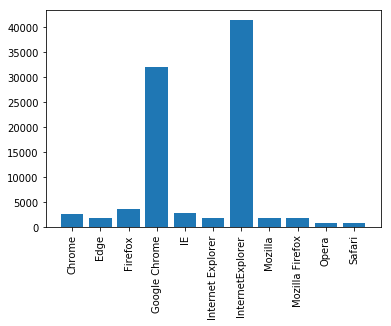

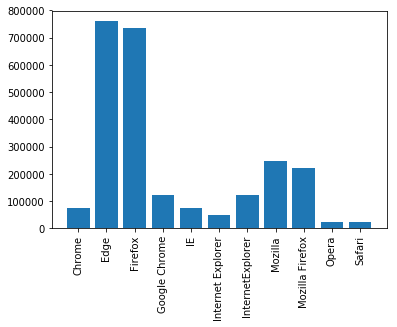

In [13]:
plot_bar(dt,11)
plot_bar(df,11)


In [18]:
dtdev = find_unique(dtrue.dropna(),'devid')
dfdev = find_unique(dfalse.dropna(),'devid')

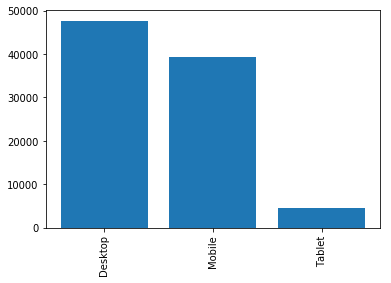

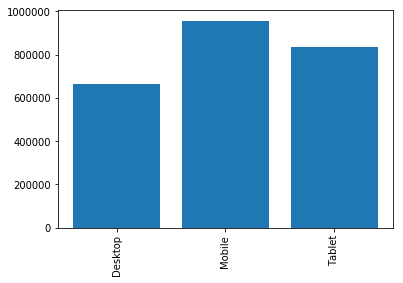

In [19]:
plot_bar(dtdev,3)
plot_bar(dfdev,3)

In [58]:
b = np.unique(browsers.dropna(), return_counts=True)
print(b)

(array(['Chrome', 'Edge', 'Firefox', 'Google Chrome', 'IE',
       'Internet Explorer', 'InternetExplorer', 'Mozilla',
       'Mozilla Firefox', 'Opera', 'Safari'], dtype=object), array([ 42573, 427208, 413862,  86831,  42853,  28387,  92063, 138606,
       124423,  14131,  14295], dtype=int64))


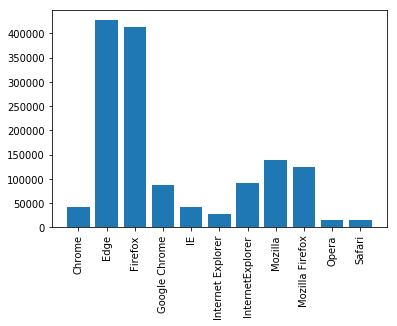

In [59]:
plot_bar(b,11)


In [42]:
dev = df['devid']


In [43]:
n = np.unique(dev.dropna(), return_counts=True)

In [44]:
print(n)

(array(['Desktop', 'Mobile', 'Tablet'], dtype=object), array([355598, 499128, 420349], dtype=int64))


In [31]:
print(n)

(array(['Desktop', 'Mobile', 'Tablet'], dtype=object), array([236897, 332597, 280689], dtype=int64))


In [9]:
df = df.dropna()
le = LabelEncoder()
ds = df.apply(le.fit_transform)

In [5]:
df = df.dropna()

In [6]:
le = LabelEncoder()
ds = df.apply(le.fit_transform)

In [10]:
print(ds.shape)
print(type(ds))
ds = ds.reset_index(drop=True)

(2544126, 10)
<class 'pandas.core.frame.DataFrame'>


In [10]:
print(ds[:9])

        ID  datetime  siteid  offerid  category  merchant  countrycode  \
0  1985608    336574   64463   104855        59        65            1   
1   124415    276132  110353   229580       117       501            2   
2  2154855    183272   69879   277753        36       274            3   
3  1863377    170106   34062   564933        97       333            4   
4   648320    116962   90333    85218        97       149            1   
5  1651438    322670   26454   221271        46       205            2   
6  2010974    171810   66127   559590       249       516            0   
7   673942    166627   79725   557826       213       460            0   
8  1659891     74991   79307    40342       125       520            1   

   browserid  devid  click  
0          8      0      0  
1          2      1      0  
2          8      0      0  
3          3      1      0  
4          2      1      0  
5          1      2      0  
6          1      2      0  
7          1      2      0 

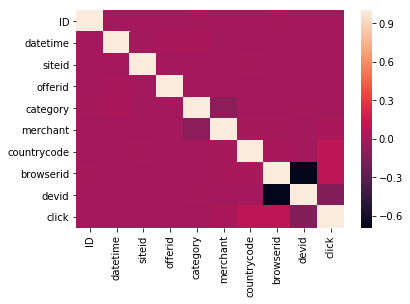

In [18]:
sns.heatmap(ds.corr())

In [11]:
input_cols = ['ID', 'datetime', 'siteid', 'offerid', 'category', 'merchant', 'countrycode', 'browserid', 'devid']
output_cols=  ['click']

In [12]:
split = int(0.80*ds.shape[0])
# print data
X = ds[input_cols]
y = ds[output_cols]
X_train = X
y_train = y
X_test = X[split:]
y_test = y[split:]
print (X_train.shape,y_train.shape)

(2544126, 9) (2544126, 1)


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [16]:
rf = RandomForestClassifier()
# rf?
rf.fit(X_train,y_train)
# print(rf.score(X_test,y_test))

e:\python35\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [20]:
rf.feature_importances_

array([ 0.09440842,  0.11779582,  0.09693566,  0.09462899,  0.05629628,
        0.06578199,  0.23075273,  0.22037362,  0.02302649])

In [24]:
test_data = pd.read_csv('../test.csv')


In [28]:
test_data = test_data.dropna()
test_data.shape

(2540027, 9)

In [29]:
le = LabelEncoder()
X_test = test_data.apply(le.fit_transform)

## 

In [30]:
y = rf.predict(X_test)

In [32]:
print(y[:50])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 0]


In [33]:
y_test = rf.predict_proba(X_test)  

In [37]:
print(y_test[50:100,1])

[ 0.   0.   0.   0.   0.   0.   0.   0.   0.1  0.   0.   0.2  0.   0.   0.
  0.   0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.6  0.   0.   0.1  0.   0.5  0.   0.   0.1  0.   0.   0.   0.   0.
  0.   0.   0.   0.   0. ]


In [39]:
for ix in range(50):
    print('%.2f'%y_test[ix,1])

0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.30
0.10
0.20
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.10
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.00
0.60
0.00
0.30
0.40
0.10
0.00
0.00
0.00
0.80
0.00
0.70
0.00
0.00


In [27]:
true_browser_list = ['Google Chrome','InternetExplorer']
false_browser_list =['Edge', 'Edge', 'Edge', 'Firefox', 'Firefox', 'Firefox']  

In [10]:
d = df.ix[0]
print(d['browserid'])

Firefox


In [31]:
for val in dtrue['browserid']:
    print(val)

<function <lambda> at 0x000002920005FD08>
Google Chrome
Google Chrome
InternetExplorer
Mozilla
Firefox
Safari
Firefox
<function <lambda> at 0x000002920005FD08>
InternetExplorer
Mozilla
InternetExplorer
Firefox
Google Chrome
<function <lambda> at 0x000002920005FD08>
Google Chrome
InternetExplorer
Mozilla Firefox
InternetExplorer
Google Chrome
Mozilla Firefox
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
<function <lambda> at 0x000002920005FD08>
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
IE
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
<function <lambda> at 0x000002920005FD08>
Edge
Google Chrome
<function <lambda> at 0x000002920005FD08>
InternetExplorer
<function <lambda> at 0x000002920005FD08>
Edge
Internet Explorer
InternetExplorer
InternetExplorer
Google Chrome
Edge
InternetExplorer
InternetExplorer
Google Chrome
<function <lambda> at 0x000002920005FD08

IE
Firefox
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
Firefox
IE
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
IE
Chrome
InternetExplorer
InternetExplorer
Mozilla Firefox
InternetExplorer
InternetExplorer
Edge
InternetExplorer
InternetExplorer
InternetExplorer
Firefox
InternetExplorer
InternetExplorer
<function <lambda> at 0x000002920005FD08>
InternetExplorer
Firefox
Google Chrome
Google Chrome
InternetExplorer
Google Chrome
Google Chrome
Firefox
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
Internet Explorer
InternetExplorer
InternetExplorer
IE
InternetExplorer
InternetExplo

Google Chrome
Google Chrome
Google Chrome
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
IE
Chrome
Chrome
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
Firefox
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
Firefox
Google Chrome
<function <lambda> at 0x000002920005FD08>
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
<function <lambda> at 0x000002920005FD08>
Google Chrome
InternetExplorer
Google Chrome
Google Chrome
Google Chrome
Google Chrome
Google Chrome
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
<function <lambda> at 0x000002920005FD08>
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
Chrome
Google Chrome
InternetExplorer
Google Chrome
Google Chrome
Google Chrome
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
InternetE

InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
Google Chrome
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
<function <lambda> at 0x000002920005FD08>
Firefox
Google Chrome
InternetExplorer
Edge
Google Chrome
InternetExplorer
InternetExplorer
Internet Explorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
Google Chrome
Google Chrome
InternetExplorer
Mozilla Firefox
Google Chrome
IE
InternetExplorer
InternetExplorer
InternetExplorer
Safari
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
Google Chrome
Google Chrome
InternetExplorer
Opera
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
Chrome
Google Chrome
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
<function <lambda> at 0x000002920005FD08>
Chrome
InternetExplorer
IE
Google Chrome
Google 

IE
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
Chrome
InternetExplorer
InternetExplorer
Opera
Google Chrome
Google Chrome
Safari
Google Chrome
Google Chrome
Chrome
InternetExplorer
Mozilla
Google Chrome
Google Chrome
Mozilla
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
Mozilla Firefox
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
<function <lambda> at 0x000002920005FD08>
<function <lambda> at 0x000002920005FD08>
InternetExplorer
InternetExplorer
<function <lambda> at 0x000002920005FD08>
<function <lambda> at 0x000002920005FD08>
IE
Chrome
InternetExplorer
InternetExplorer
InternetExplorer
Edge
InternetExplorer
InternetExplorer
InternetExplorer
<function <lambda> at 0x000002920005FD08>
Firefox
Google Chrome
<function <lambda> at 0x000002920005FD08>
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExp

Google Chrome
Firefox
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
IE
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
Google Chrome
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
Chrome
InternetExplorer
InternetExplorer
Mozilla Firefox
Google Chrome
Google Chrome
Google Chrome
Mozilla
Google Chrome
InternetExplorer
Mozilla Firefox
InternetExplorer
InternetExplorer
Google Chrome
<function <lambda> at 0x000002920005FD08>
IE
Firefox
InternetExplorer
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
Firefox
Google Chrome
Google Chrome
InternetExplorer
Firefox
InternetExplorer
Google Chrome
InternetExplorer
Firefox
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
Opera
<function <lambda> at 0x000002920005FD08>
Google Chrome
InternetExplorer
Google Chrome
Google Chrome
Firef

Google Chrome
<function <lambda> at 0x000002920005FD08>
InternetExplorer
Mozilla
Google Chrome
InternetExplorer
Firefox
Chrome
Mozilla Firefox
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
<function <lambda> at 0x000002920005FD08>
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
Internet Explorer
Google Chrome
Chrome
Google Chrome
Google Chrome
InternetExplorer
<function <lambda> at 0x000002920005FD08>
Firefox
Google Chrome
InternetExplorer
InternetExplorer
Opera
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
Firefox
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
<function <lambda> at 0x000002920005FD08>
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
IE
InternetExplorer
Opera
InternetExplorer
Google Chrome
InternetExplorer
Safari
Mozilla Firefox
Inter

InternetExplorer
Google Chrome
Google Chrome
Google Chrome
IE
Google Chrome
Google Chrome
InternetExplorer
IE
IE
Google Chrome
Google Chrome
InternetExplorer
Google Chrome
IE
Opera
Google Chrome
Google Chrome
InternetExplorer
Mozilla
Google Chrome
Google Chrome
IE
InternetExplorer
InternetExplorer
InternetExplorer
Mozilla Firefox
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
<function <lambda> at 0x000002920005FD08>
Google Chrome
InternetExplorer
Google Chrome
Google Chrome
Edge
InternetExplorer
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
IE
Google Chrome
Google Chrome
InternetExplorer
Firefox
Mozilla
Google Chrome
Google Chrome
Edge
InternetExplorer
Google Chrome
Edge
Google Chrome
Google Chrome
Google Chrome
Internet Explorer
<function <lambda> at 0x000002920005FD08>
Google Chrome
Opera
InternetExplorer
Mozilla Firefox
Google Chrome
Google Chrome
Internet Explorer
IE
Google Chrome
Google C

InternetExplorer
Google Chrome
Google Chrome
IE
Mozilla
InternetExplorer
InternetExplorer
InternetExplorer
Firefox
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
Chrome
Firefox
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
<function <lambda> at 0x000002920005FD08>
InternetExplorer
Safari
Opera
Google Chrome
Google Chrome
Google Chrome
<function <lambda> at 0x000002920005FD08>
Firefox
IE
InternetExplorer
Edge
Mozilla Firefox
InternetExplorer
InternetExplorer
Opera
InternetExplorer
IE
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
IE
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
Goo

InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
<function <lambda> at 0x000002920005FD08>
InternetExplorer
IE
Google Chrome
Google Chrome
InternetExplorer
Google Chrome
Firefox
Mozilla
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
Firefox
Google Chrome
Google Chrome
InternetExplorer
Internet Explorer
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
Firefox
Chrome
Edge
InternetExplorer
InternetExplorer
Internet Explorer
<function <lambda> at 0x000002920005FD08>
Firefox
Google Chrome
InternetExplorer
<function <lambda> at 0x000002920005FD08>
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
InternetExplo

InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
Safari
Firefox
IE
Google Chrome
InternetExplorer
Edge
Chrome
InternetExplorer
InternetExplorer
<function <lambda> at 0x000002920005FD08>
Google Chrome
InternetExplorer
Safari
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
Edge
Google Chrome
Google Chrome
InternetExplorer
IE
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
<function <lambda> at 0x000002920005FD08>
Mozilla
InternetExplorer
Firefox
Safari
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
<function <lambda> at 0x000002920005FD08>
Internet Explorer
Mozilla
<function <lambda> at 0x000002920005FD08>
InternetExplorer
Google Chrome
Google Chrome
Chrome
Firefox
Google Chrome
InternetExplorer
Google Chrome
Firefox
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
InternetE

Google Chrome
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
Safari
Edge
Firefox
InternetExplorer
Google Chrome
Edge
Firefox
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
Internet Explorer
InternetExplorer
InternetExplorer
InternetExplorer
<function <lambda> at 0x000002920005FD08>
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
InternetExplorer
Google Chrome
Firefox
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
<function <lambda> at 0x000002920005FD08>
Google Chrome
Google Chrome
Google Chrome
IE
InternetExplorer
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
Google Chrome
Edge
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
Mozilla Firefox
InternetExplorer
Inte

InternetExplorer
Mozilla Firefox
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
Mozilla Firefox
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
<function <lambda> at 0x000002920005FD08>
InternetExplorer
Google Chrome
<function <lambda> at 0x000002920005FD08>
InternetExplorer
Mozilla
Google Chrome
Google Chrome
Edge
Firefox
Google Chrome
IE
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
Opera
InternetExplorer
Google Chrome
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
Opera
InternetExplorer
Mozilla Firefox
Firefox
InternetExplorer
InternetExplorer
<function <lambda> at 0x000002920005FD08>
Google Chrome
IE
InternetExplorer
InternetExplor

Google Chrome
Google Chrome
Google Chrome
Google Chrome
Google Chrome
Internet Explorer
InternetExplorer
Chrome
Google Chrome
Mozilla Firefox
InternetExplorer
Google Chrome
InternetExplorer
<function <lambda> at 0x000002920005FD08>
Google Chrome
Google Chrome
<function <lambda> at 0x000002920005FD08>
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
Chrome
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
Firefox
<function <lambda> at 0x000002920005FD08>
InternetExplorer
InternetExplorer
Google Chrome
Firefox
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
InternetExplorer
Google Chrome
Firefox
InternetExplorer
Firefox
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
InternetExplorer
Google Chrome
Firefox
Google Chrome
InternetExplorer
InternetExplorer
Internet Ex

Mozilla
IE
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
<function <lambda> at 0x000002920005FD08>
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
Internet Explorer
Firefox
Google Chrome
Chrome
InternetExplorer
<function <lambda> at 0x000002920005FD08>
InternetExplorer
InternetExplorer
Internet Explorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
Firefox
Google Chrome
Google Chrome
Google Chrome
InternetExplorer
Firefox
Google Chrome
Google Chrome
InternetExplorer
IE
Opera
InternetExplorer
Mozilla Firefox
InternetExplorer
InternetExplorer
IE
Google Chrome
Edge
InternetExplorer
Firefox
Edge
Mozilla
Google Chrome
IE
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
InternetExplorer
Internet Explorer
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
Intern

Chrome
InternetExplorer
InternetExplorer
Safari
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
Internet Explorer
IE
Google Chrome
Google Chrome
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
<function <lambda> at 0x000002920005FD08>
<function <lambda> at 0x000002920005FD08>
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
Google Chrome
InternetExplorer
<function <lambda> at 0x000002920005FD08>
Mozilla Firefox
<function <lambda> at 0x000002920005FD08>
Google Chrome
Google Chrome
InternetExplorer
<function <lambda> at 0x000002920005FD08>
InternetExplorer
Opera
Google Chrome
<function <lambda> at 0x000002920005FD08>
InternetExplorer
Opera
Google Chrome
Google Chrome
IE
IE
Mozilla Firefox
InternetExplorer
Google Chrome
Safari
InternetExplorer
Google Chrome
InternetExplorer
<functi

InternetExplorer
Mozilla
Firefox
Edge
InternetExplorer
Mozilla
InternetExplorer
Google Chrome
Google Chrome
Google Chrome
Google Chrome
InternetExplorer
Edge
Firefox
Internet Explorer
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
Internet Explorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
Opera
InternetExplorer
Google Chrome
<function <lambda> at 0x000002920005FD08>
IE
Chrome
InternetExplorer
Internet Explorer
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
InternetExplorer
Mozilla
Google Chrome
Google Chrome
Google Chrome
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
Opera
InternetExplorer
InternetExplorer
<function <lambda> at 0x000002920005FD08>
Google Chrome
InternetExplorer
<function <lambda> at 0x000002920005FD08>
InternetExplorer
InternetExplorer
Chrome

InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
Firefox
<function <lambda> at 0x000002920005FD08>
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
Internet Explorer
InternetExplorer
Google Chrome
Google Chrome
InternetExplorer
Mozilla Firefox
InternetExplorer
Google Chrome
InternetExplorer
Opera
Google Chrome
InternetExplorer
Google Chrome
Google Chrome
Google Chrome
InternetExplorer
<function <lambda> at 0x000002920005FD08>
InternetExplorer
Chrome
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
<function <lambda> at 0x000002920005FD08>
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
Google Chrome
Google Chrome
IE
Firefox
Google Chrome
InternetExplorer
InternetExplorer
Opera
InternetExplorer
InternetExplorer
Mozilla Firefox
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
Internet Explorer
InternetExplorer
<function <lambda> at 0x00000

Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
Firefox
InternetExplorer
InternetExplorer
Google Chrome
Firefox
<function <lambda> at 0x000002920005FD08>
InternetExplorer
InternetExplorer
Firefox
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
<function <lambda> at 0x000002920005FD08>
<function <lambda> at 0x000002920005FD08>
InternetExplorer
Firefox
Chrome
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
Firefox
<function <lambda> at 0x000002920005FD08>
InternetExplorer
InternetExplorer
Google Chrome
Firefox
Google Chrome
Firefox
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
Mozilla
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
Google Chrome
InternetExplorer
Google Chrome
Mozilla Firefox
Google Chrome
InternetExplorer
InternetExplorer


Google Chrome
Google Chrome
Google Chrome
Google Chrome
Firefox
Google Chrome
<function <lambda> at 0x000002920005FD08>
<function <lambda> at 0x000002920005FD08>
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
Edge
Edge
Google Chrome
Firefox
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
Mozilla Firefox
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
Mozilla
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
Google Chrome
Google Chrome
Edge
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
<function <lambda> at 0x000002920005FD08>
InternetExplorer
Google Chrome
Mozilla
Google Chrome
InternetExplorer
InternetExplorer
Mozilla
Opera
InternetExplorer
Google Chrome
Google Chrome
Google Chrome
InternetExplorer
Firefox
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
<f

InternetExplorer
Google Chrome
Google Chrome
InternetExplorer
Internet Explorer
InternetExplorer
Google Chrome
IE
Safari
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
Google Chrome
Google Chrome
Google Chrome
InternetExplorer
Chrome
Mozilla Firefox
Google Chrome
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
Internet Explorer
<function <lambda> at 0x000002920005FD08>
Google Chrome
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
Edge
Google Chrome
Google Chrome
<function <lambda> at 0x000002920005FD08>
Google Chrome
InternetExplorer
InternetExplorer
<function <lambda> at 0x000002920005FD08>
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
Mozilla Firefox
InternetExplorer
IE
Chrome
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome

IE
InternetExplorer
Firefox
InternetExplorer
Google Chrome
Google Chrome
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
<function <lambda> at 0x000002920005FD08>
Mozilla Firefox
Google Chrome
Google Chrome
Google Chrome
IE
InternetExplorer
InternetExplorer
Internet Explorer
Internet Explorer
InternetExplorer
<function <lambda> at 0x000002920005FD08>
Google Chrome
InternetExplorer
Google Chrome
Internet Explorer
InternetExplorer
Firefox
Google Chrome
Google Chrome
Google Chrome
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
Mozilla Firefox
Google Chrome
InternetExplorer
Mozilla
Chrome
Chrome
InternetExplorer
Google Chrome
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
Chrome
<function <lambda> at 0x000002920005FD08>
Internet Explorer
InternetExplorer
InternetExplorer
Mozilla Firefox
Google Chrome
<function <lambda> at 0x000002920005FD08>
Google Chrome
Google Chr

Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
<function <lambda> at 0x000002920005FD08>
IE
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
Edge
Chrome
Edge
Google Chrome
InternetExplorer
Firefox
InternetExplorer
IE
Google Chrome
Google Chrome
<function <lambda> at 0x000002920005FD08>
InternetExplorer
InternetExplorer
Mozilla Firefox
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
Mozilla
IE
InternetExplorer
InternetExplorer
Google Chrome
Mozilla
Chrome
Google Chrome
InternetExplorer
Edge
Google Chrome
Google Chrome
Google Chrome
IE
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
Safari
InternetExplorer
Google Chrome
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
Firefox
InternetExplorer
InternetExplorer
In

InternetExplorer
Google Chrome
<function <lambda> at 0x000002920005FD08>
Google Chrome
Internet Explorer
Google Chrome
Google Chrome
IE
<function <lambda> at 0x000002920005FD08>
InternetExplorer
Google Chrome
Mozilla Firefox
Google Chrome
InternetExplorer
Firefox
InternetExplorer
InternetExplorer
InternetExplorer
<function <lambda> at 0x000002920005FD08>
<function <lambda> at 0x000002920005FD08>
InternetExplorer
InternetExplorer
InternetExplorer
Edge
InternetExplorer
Mozilla Firefox
InternetExplorer
Chrome
Internet Explorer
InternetExplorer
<function <lambda> at 0x000002920005FD08>
InternetExplorer
Firefox
InternetExplorer
InternetExplorer
InternetExplorer
<function <lambda> at 0x000002920005FD08>
Internet Explorer
Google Chrome
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
IE
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
E

InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
Safari
<function <lambda> at 0x000002920005FD08>
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
Internet Explorer
Google Chrome
Google Chrome
<function <lambda> at 0x000002920005FD08>
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
<function <lambda> at 0x000002920005FD08>
<function <lambda> at 0x000002920005FD08>
InternetExplorer
InternetExplorer
Google Chrome
Internet Explorer
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
<function <lambda> at 0x000002920005FD08>
Google Chrome
Safari
Firefox
Firefox
InternetExplorer
InternetExplorer
InternetExplorer
Chrome
InternetExplorer
Google Chrome
Google Chrome
InternetExplorer
Google Chrome
Internet Explorer
InternetExplorer
<function <lambda> at 0x000002920005FD08>
InternetExp

InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
<function <lambda> at 0x000002920005FD08>
InternetExplorer
Internet Explorer
Google Chrome
Google Chrome
InternetExplorer
Google Chrome
Google Chrome
Google Chrome
Google Chrome
Google Chrome
InternetExplorer
Google Chrome
Opera
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
Firefox
Google Chrome
InternetExplorer
Edge
InternetExplorer
InternetExplorer
<function <lambda> at 0x000002920005FD08>
Chrome
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
<function <lambda> at 0x000002920005FD08>
InternetExplorer
Google Chrome
Internet Explorer
InternetExplorer
Internet Explorer
Firefox
Chrome
InternetExplorer
Google Chrome
Google Chrome
Google Chrome
Internet Explorer
InternetExplorer
InternetExplorer
Chrome
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
Goog

<function <lambda> at 0x000002920005FD08>
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
Mozilla
InternetExplorer
InternetExplorer
Chrome
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
Safari
Google Chrome
Google Chrome
InternetExplorer
Google Chrome
Google Chrome
Firefox
Edge
Mozilla Firefox
Edge
InternetExplorer
Mozilla Firefox
Google Chrome
<function <lambda> at 0x000002920005FD08>
InternetExplorer
Google Chrome
InternetExplorer
Mozilla
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
IE
IE
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
<function <lambda> at 0x000002920005FD08>
InternetExplorer
InternetExplorer
IE
Internet Explorer
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
Opera
Google Chrome
Google Chrome
Google Chrome
Mozilla Firefox
Google Chrome
IE
Chrome
Google Chrome
Firefox
Chrome
Google Chrome
InternetExplorer
Safari
<function <lambda

InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
<function <lambda> at 0x000002920005FD08>
Google Chrome
InternetExplorer
Chrome
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
Chrome
InternetExplorer
Google Chrome
<function <lambda> at 0x000002920005FD08>
Google Chrome
Mozilla
Chrome
Google Chrome
Google Chrome
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
<function <lambda> at 0x000002920005FD08>
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
Google Chrome
Safari
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
InternetExplorer
<function <lambda> at 0x000002920005FD08>
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
InternetExplorer
InternetExplorer
Safari
Google Chrome
InternetExplorer
Google Chrome
Internet Explorer
Chrome
Google Chrome
Google Chrome
InternetExplorer
Internet

Firefox
Internet Explorer
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
Chrome
<function <lambda> at 0x000002920005FD08>
InternetExplorer
Firefox
Mozilla
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
IE
InternetExplorer
InternetExplorer
InternetExplorer
Edge
InternetExplorer
IE
InternetExplorer
IE
Firefox
Google Chrome
InternetExplorer
Google Chrome
InternetExplorer
<function <lambda> at 0x000002920005FD08>
InternetExplorer
Internet Explorer
InternetExplorer
Google Chrome
InternetExplorer
Google Chrome
Google Chrome
<function <lambda> at 0x000002920005FD08>
InternetExplorer
Google Chrome
Internet Explorer
InternetExplorer
IE
Google Chrome
Google Chrome
Google Chrome
InternetExplorer
InternetExplorer
Google Chrome
Firefox
Opera
InternetExplorer
InternetExplorer
InternetExplorer
Google Chrome
Google Chrome
IE
Edge
IE
InternetExplor

KeyboardInterrupt: 

In [57]:
d = df.iloc[26]

In [16]:
d['browserid']

'Mozilla'

In [13]:
d['devid'] == 'nan'

False

In [20]:
np.isnan(d['browserid'])

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [24]:
d = dtrue['browserid']

In [29]:
split = int(0.5*d.shape[0])
split
# next_end = split+split
# next_end

45806

In [30]:
d[:split].fillna('InternetExplorer', inplace=True)
d[split:].fillna('Google Chrome', inplace=True)

In [31]:
print(d)

16            Google Chrome
35            Google Chrome
67         InternetExplorer
90                  Mozilla
153                 Firefox
187                  Safari
205                 Firefox
222        InternetExplorer
252                 Mozilla
258        InternetExplorer
299                 Firefox
364           Google Chrome
389           Google Chrome
398        InternetExplorer
455           Google Chrome
457         Mozilla Firefox
536        InternetExplorer
591        InternetExplorer
655        InternetExplorer
744        InternetExplorer
830        InternetExplorer
936        InternetExplorer
939        InternetExplorer
971        InternetExplorer
991        InternetExplorer
1111       InternetExplorer
1192          Google Chrome
1299                   Edge
1336          Google Chrome
1361       InternetExplorer
                 ...       
3498623    InternetExplorer
3498625    InternetExplorer
3498670    InternetExplorer
3498679    InternetExplorer
3498753    InternetE

In [32]:
d2 = dtrue['devid']


In [33]:
print(d2.shape)
split = int(0.6*d2.shape[0])

(91613,)


In [34]:
d2[:split].fillna('Desktop', inplace=True)
d2[split:].fillna('Mobile', inplace=True)

In [35]:
d3 = dtrue['siteid']
d3

16          469603.0
35         5369414.0
67         6005717.0
90         7979331.0
153        2092870.0
187          94250.0
205        7885100.0
222        5571806.0
252        8476528.0
258        2148269.0
299        6357104.0
364        1321785.0
389        9316347.0
398        4510569.0
455        5206322.0
457        9108914.0
536        7639385.0
591          59336.0
655        7803296.0
744        9469286.0
830        3750885.0
936        3768424.0
939        9947020.0
971        4066020.0
991        4905683.0
1111       2542390.0
1192       6366968.0
1299       2605848.0
1336       5630492.0
1361       3724548.0
             ...    
3498623    3192044.0
3498625    4316901.0
3498670    6096230.0
3498679    4432299.0
3498753    7838203.0
3498766    4062533.0
3498898    4426777.0
3498930    8532099.0
3498938    9735667.0
3498958    3871408.0
3499037    9556106.0
3499151    2627828.0
3499176    4792056.0
3499308    2584181.0
3499341    5824244.0
3499396    8342649.0
3499456    78

In [36]:
d3.fillna(5018920.0, inplace=True)

e:\python35\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [65]:
dfalse.describe()

,siteid,offerid,category,merchant,click
count,3.374025e+06,3.374025e+06,3.374025e+06,3.374025e+06,3374025.0
mean,5.474417e+06,4.965262e+05,4.220105e+04,4.888385e+07,0.0
std,3.070574e+06,2.897369e+05,2.944840e+04,2.908012e+07,0.0
min,1.110000e+02,0.000000e+00,9.700000e+01,2.604430e+05,0.0
25%,2.797498e+06,2.475320e+05,1.496000e+04,2.639177e+07,0.0
50%,5.604295e+06,4.956460e+05,4.033900e+04,4.861553e+07,0.0
75%,8.387533e+06,7.470360e+05,6.678600e+04,7.436361e+07,0.0
max,9.999996e+06,9.999980e+05,9.991400e+04,9.977043e+07,0.0


In [66]:
dfalse.to_csv('dfalse.csv',index=False)

In [28]:
split = int(0.2*dfalse.shape[0])
end = split+int(0.5*dfalse.shape[0])
next_split = int((dfalse.shape[0] - end))
end-next_split ,split ,end-split

(1349609, 674805, 1687012)

In [19]:
dbf = dfalse['browserid']


In [11]:
dbf[:split].fillna('Edge', inplace=True)
dbf[split:end].fillna('Firefox', inplace=True)
dbf[end:next_split].fillna('Mozilla', inplace=True)
dbf[next_split:].fillna('Mozilla Firefox', inplace=True)

In [21]:
dbd = dfal


In [30]:
dbd[:split].fillna('Desktop', inplace=True)
dbd[split:end].fillna('Mobile', inplace=True)
dbd[end:].fillna('Tablet', inplace=True)

In [62]:
dsd = dfalse['siteid']

In [63]:
dsd.fillna(9538250, inplace=True)

e:\python35\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [51]:
dsd

(array([  1.11000000e+02,   1.47000000e+02,   2.45000000e+02, ...,
          9.99993900e+06,   9.99997900e+06,   9.99999600e+06]),
 array([ 5, 21,  1, ..., 74,  4, 48], dtype=int64))

In [50]:
import operator
index,value = print(max(enumerate(dsd[1]), key=operator.itemgetter(1)))
l = dsd[0]
l

(75060, 11038)


TypeError: 'NoneType' object is not iterable

In [59]:
l = dfalse.iloc[75060]
l,9538250

ID                       IDAh7bAoT
datetime       2017-01-12 14:48:04
siteid                 9.53825e+06
offerid                     279657
category                     35368
merchant                  74868704
countrycode                      f
browserid                       IE
devid                       Mobile
click                            0
Name: 77924, dtype: object

In [31]:
print(dfalse)

                ID             datetime     siteid  offerid  category  \
0        IDsrk7SoW  2017-01-14 09:42:09  4709696.0   887235     17714   
1        IDmMSxHur  2017-01-18 17:50:53  5189467.0   178235     21407   
2        IDVLNN0Ut  2017-01-11 12:46:49    98480.0   518539     25085   
3        ID32T6wwQ  2017-01-17 10:18:43  8896401.0   390352     40339   
4        IDqUShzMg  2017-01-14 16:02:33  5635120.0   472937     12052   
5        IDjO9XQ1Z  2017-01-14 12:08:49  2729292.0   961176     33638   
6        IDUuVWVrO  2017-01-12 13:07:08  7007059.0   664666     68847   
7        IDFnmhUgG  2017-01-13 05:58:13  7295565.0   144797     33638   
8        IDeFBJfzG  2017-01-18 13:00:54  2116058.0   376073     15912   
9        IDmyijsRf  2017-01-14 12:38:58  5329483.0   952097     89680   
10       IDGQGYgdk  2017-01-14 11:06:26  6436389.0   949077     76239   
11       IDeS7iMpY  2017-01-12 03:36:53  6401189.0    68770     43612   
12       IDZHmfQix  2017-01-18 14:52:22  6139730.0 